# Exercise 1: Identify Target Variable and Related KPIs for the Business Problem

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import DecisionTreeClassifier from sklearn and 
# BorutaPy from boruta
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import boruta

In [2]:
url = 'https://raw.githubusercontent.com/htetaunglynn94/big_data_analysis_python/refs/heads/main/lesson_6/bank.csv'
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2112,46,admin.,married,secondary,no,22,yes,no,cellular,7,aug,414,4,-1,0,unknown,no
1514,32,technician,married,secondary,no,167,yes,yes,cellular,8,aug,79,3,-1,0,unknown,no
1991,37,entrepreneur,divorced,tertiary,no,66,no,no,cellular,18,nov,1164,2,-1,0,unknown,yes
2336,35,management,married,tertiary,no,2682,yes,no,cellular,9,jul,156,1,-1,0,unknown,no
109,27,housemaid,married,primary,no,0,yes,no,cellular,23,jul,435,3,-1,0,unknown,no
3364,40,self-employed,divorced,secondary,no,1876,no,yes,unknown,20,jun,269,1,-1,0,unknown,no
1635,33,blue-collar,married,secondary,no,687,yes,no,cellular,14,may,72,2,370,1,failure,no
4076,53,blue-collar,married,primary,no,53,yes,no,cellular,7,apr,208,1,140,1,failure,no
2617,41,services,married,secondary,no,171,no,no,cellular,21,jul,71,9,-1,0,unknown,no
3900,30,admin.,single,secondary,no,3809,yes,no,unknown,3,jun,159,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
n_subcr = df.y.value_counts()
n_subcr

no     4000
yes     521
Name: y, dtype: int64

<Axes: >

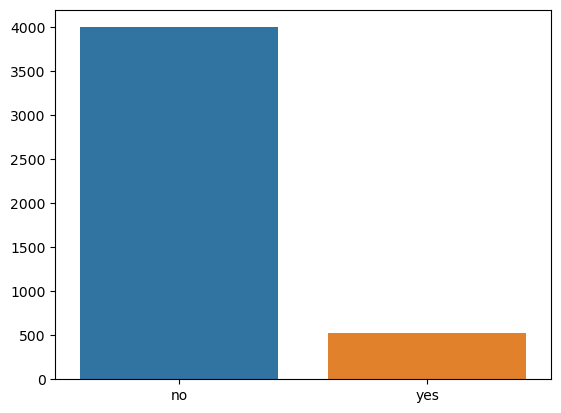

In [7]:
sns.barplot(x=n_subcr.index, y=n_subcr.values)

In [8]:
180/5

36.0

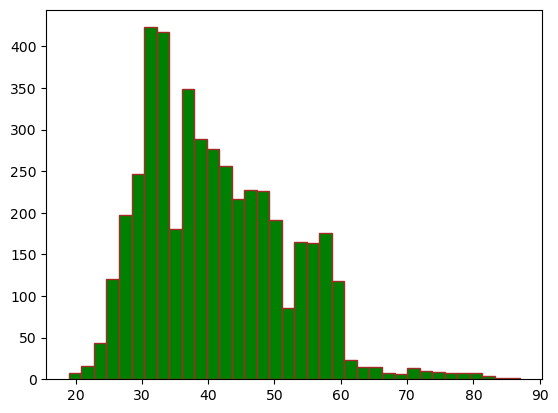

In [9]:
# histogram for age (using matplotlib)
plt.hist(df['age'], color='green', edgecolor='brown', bins=int(180/5))
plt.show()

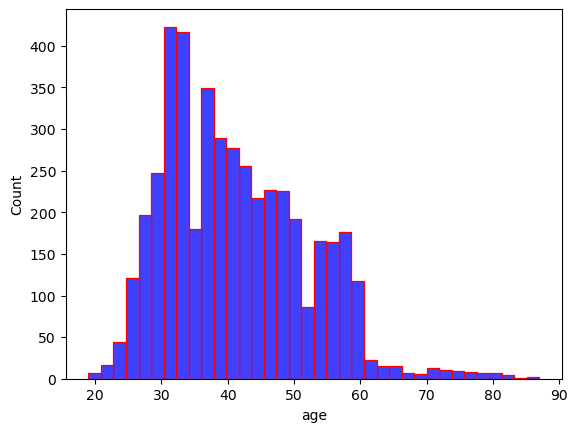

In [10]:
# histogram for age (using seaborn)
sns.histplot(df['age'], kde=False, bins=int(180/5), color='blue', edgecolor='red')
plt.show()

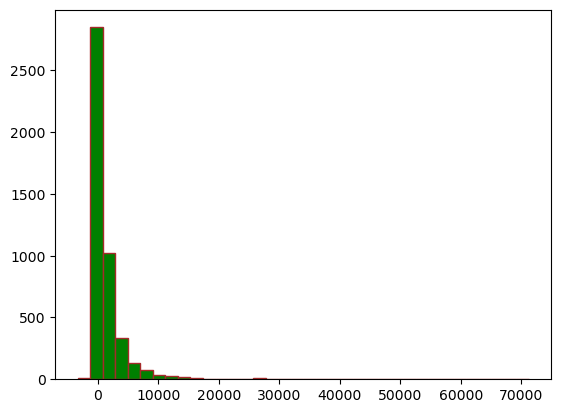

In [11]:
# histogram for balance (using matplotlib)
plt.hist(df['balance'], color = 'green', edgecolor = 'brown', bins = int(180/5))
plt.show()

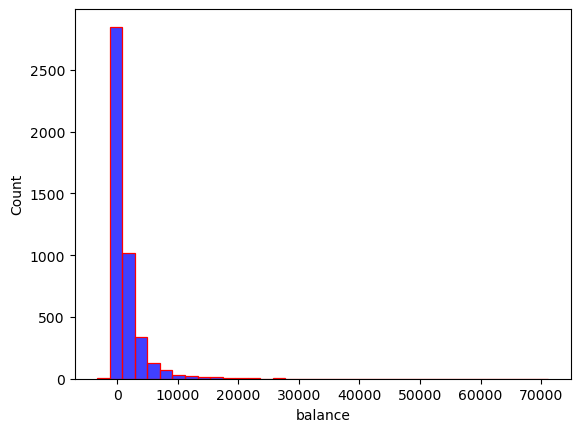

In [12]:
# histogram for balance (using seaborn)
sns.histplot(df['balance'], kde=False, bins=int(180/5), color = 'blue', edgecolor= 'red')
plt.show()

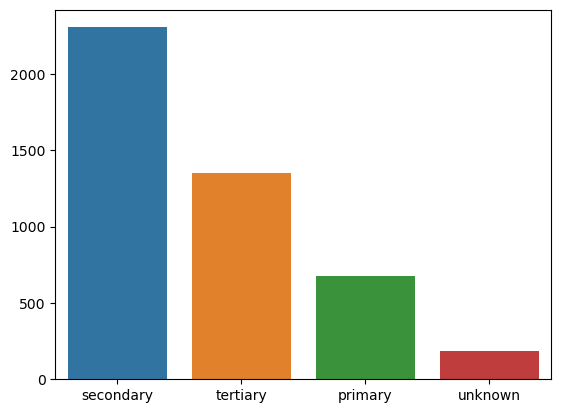

In [13]:
# barplot for the variable 'education'
count_edu = df["education"].value_counts()
sns.barplot(x=count_edu.index, y=count_edu.values)
plt.show()

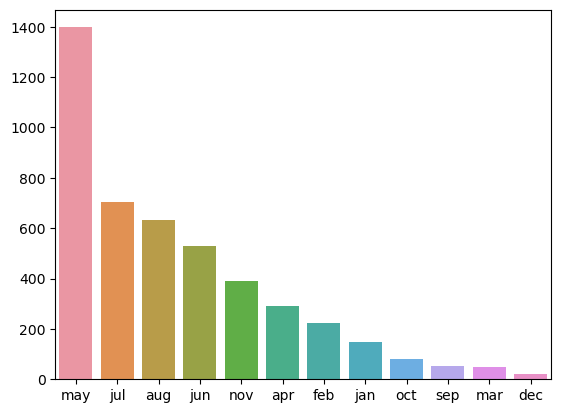

In [14]:
# barplot for the variable 'month'
count_mnth = df["month"].value_counts()
sns.barplot(x=count_mnth.index, y=count_mnth.values)
plt.show()

In [15]:
x1 = list(df[df['y'] == 'yes']['age']) # age of subscriber

x2 = list(df[df['y'] == 'no']['age'])  # age of non-subscriber

In [16]:
# assign colors for each subscription type 
colors = ['#E69F00', '#56B4E9']
names = ['yes', 'no']

Text(0.5, 1.0, 'Histogram for Yes and No Events w.r.t. IV')

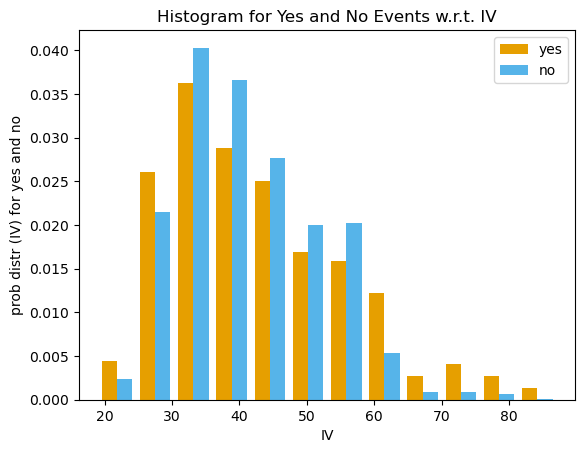

In [17]:
plt.hist([x1, x2], bins=int(180/15), density=True, color=colors, label=names)

# plot formatting
plt.legend()
plt.xlabel('IV')
plt.ylabel('prob distr (IV) for yes and no')
plt.title('Histogram for Yes and No Events w.r.t. IV')

In [18]:
df.groupby(["month", "y"]).size()[0:5]

month  y  
apr    no     237
       yes     56
aug    no     554
       yes     79
dec    no      11
dtype: int64

In [19]:
df.groupby(["month", "y"]).size().unstack()

y,no,yes
month,,
apr,237,56
aug,554,79
dec,11,9
feb,184,38
jan,132,16
jul,645,61
jun,476,55
mar,28,21
may,1305,93


<Axes: xlabel='month'>

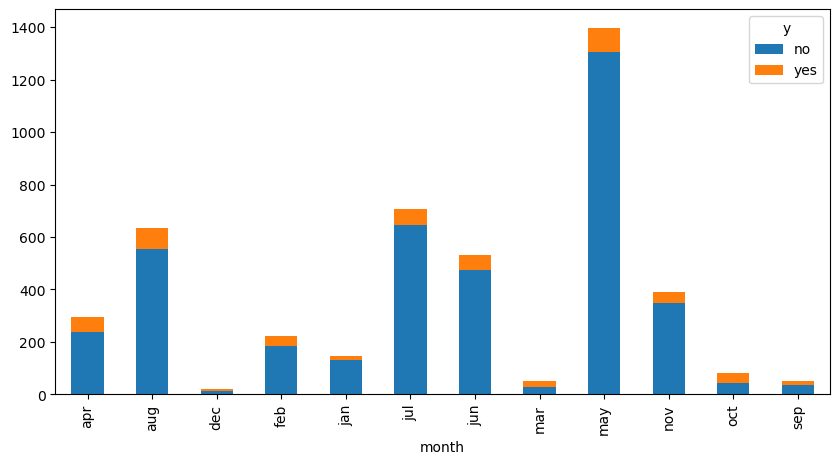

In [20]:
df.groupby(["month", "y"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

# Exercise 2: Generate Feature Importance of Target Variable and EDA

In [21]:
df['y'].replace(['yes','no'],[1,0],inplace=True)
df['default'].replace(['yes','no'],[1,0],inplace=True)
df['housing'].replace(['yes','no'],[1,0],inplace=True)
df['loan'].replace(['yes','no'],[1,0],inplace=True)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [23]:
corr_df = df.select_dtypes('number').corr()
corr_df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017885,0.083820,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
default,-0.017885,1.000000,-0.070886,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.026656,0.001303
balance,0.083820,-0.070886,1.000000,-0.050227,-0.071349,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
housing,-0.193888,0.006881,-0.050227,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.038621,-0.104683
loan,-0.011250,0.063994,-0.071349,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.022115,-0.070517
day,-0.017853,-0.013261,-0.008677,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.011615,-0.015950,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.012348,-0.009976,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,-0.026317,0.009437,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,-0.026656,0.026196,0.038621,-0.022115,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714


Figure(640x480)


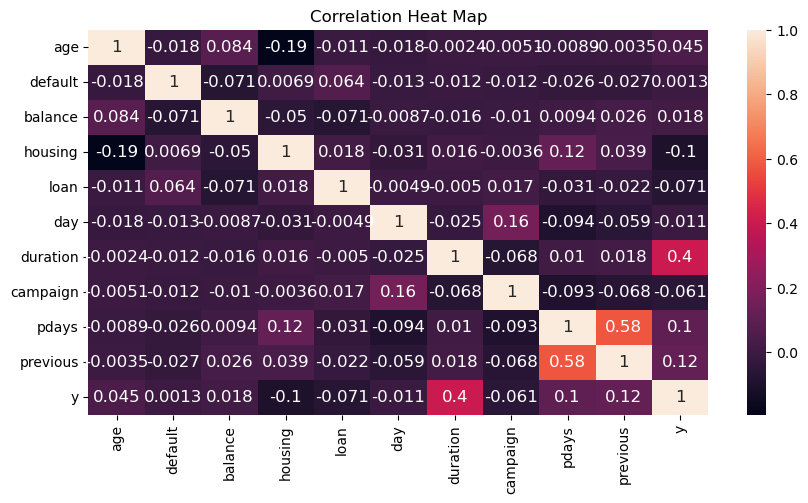

In [40]:
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values, 
            yticklabels=corr_df.columns.values, 
            annot=True, 
            annot_kws={'size':12})
heat_map = plt.gcf()
print(heat_map)
heat_map.set_size_inches(10,5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heat Map")
plt.show()

In [25]:
!pip install boruta --upgrade

In [26]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [27]:
# import DecisionTreeClassifier from sklearn and 
# BorutaPy from boruta

# transform all categorical data types to integers (hot-encoding)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [28]:
X = df.drop('y', axis=1).values
X

array([[ 30,  10,   1, ...,  -1,   0,   3],
       [ 33,   7,   1, ..., 339,   4,   0],
       [ 35,   4,   2, ..., 330,   1,   0],
       ...,
       [ 57,   9,   1, ...,  -1,   0,   3],
       [ 28,   1,   1, ..., 211,   3,   1],
       [ 44,   2,   2, ..., 249,   7,   1]])

In [29]:
Y = df['y'].values
Y

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# build RandomForestClassifier, Boruta models and
# related parameter
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)

As per the code:  
- `n_estimators = 200`: The model will build 200 decision trees in the forest.
- `n_jobs = 4`: The model will use 4 cores of the processor for parallel processing, speeding up training.
- `class_weight = 'balanced'`: Helps the model deal with imbalanced classes by adjusting the weights of each class.
- `max_depth = 6`: Limits the depth of each tree to prevent overfitting.

`RandomForestClassifier` is used to solve a classification problem (categorical outcomes or class labels)  
`BorutaPy` is used for feature selection, which is relevant in modelling (mostly used for **Random Forest Classifier**)

In [31]:
n_train = len(X)
n_train

4521

In [32]:
boruta_selector.fit(X,Y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=70, n_jobs=4,
                                          random_state=RandomState(MT19937) at 0x7BFE78789540),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7BFE78789540, verbose=2)

- **Confirmed Features**: 8 features are considered important for your predictive model.
- **Rejected Features**: 8 features are not useful and were rejected.
- **Tentative Features**: Initially, some features were tentative, but after 32 iterations, no tentative features remained, indicating that the algorithm has finished evaluating and classifying all features.

In [33]:
# check feature ranking
feature_df = pd.DataFrame(df.drop(['y'], axis=1).columns.tolist(), columns=['features'])
feature_df

,features
0,age
1,job
2,marital
3,education
4,default
5,balance
6,housing
7,loan
8,contact
9,day


In [34]:
feature_df['rank'] = boruta_selector.ranking_
feature_df

,features,rank
0,age,1
1,job,6
2,marital,7
3,education,8
4,default,9
5,balance,1
6,housing,2
7,loan,5
8,contact,1
9,day,3


In [35]:
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
feature_df

,features,rank
0,age,1
1,balance,1
2,contact,1
3,month,1
4,duration,1
5,pdays,1
6,previous,1
7,poutcome,1
8,housing,2
9,day,3


Text(0.5, 1.0, 'Ranking of most contributed features to classification model')

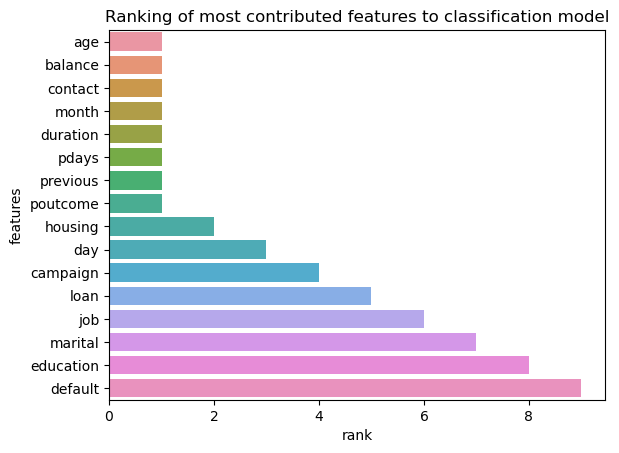

In [39]:
sns.barplot(x='rank',y='features',data=feature_df)
plt.title('Ranking of most contributed features to classification model')

RANK 1 features $\to$ `age`, `balance`, `contact`, `month`, `duration`, `pdays`, `previous` and `poutcome` are the most contribution to our classification model.